In [ ]:
from src.model import ModelRegistry

"""
"Qwen/Qwen-VL", 
              "Qwen/Qwen-VL-Chat-Int4", 
"""
model_list = [
              "google/paligemma-3b-mix-224", 
              "Salesforce/blip-image-captioning-base"]


for model in model_list: 
    ModelRegistry(model_id=model)

In [ ]:
from transformers import pipeline

# Initialize the image captioning pipeline
pipe = pipeline("image-to-text", 
                model="model/Qwen_VL", 
                tokenizer="model/Qwen_VL",
                trust_remote_code=True)

In [8]:
from PIL import Image

img = Image.open("./samples/66505089_1708691860706.jpg").convert("RGB")

# Generate a description for the image
description = pipe(img)

/home/octoopt/anaconda3/envs/stoic_lab/lib/python3.11/site-packages/transformers/generation/utils.py:1127: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [9]:
description

[{'generated_text': 'the building has a green aw aw aw aw aw aw aw aw aw aw aw aw aw aw'}]

In [1]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image

model_id = "./model/paligemma_3b_mix_224"
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, local_files_only=True)
processor = AutoProcessor.from_pretrained(model_id, local_files_only=True)


`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]


leaves


In [3]:
prompt = """Describes everything you see in the provided picture. Here are some additional information that you can use to 
            improve your observation: 
            
            Heineken Vietnam is dedicated to delivering top-quality branding experiences to our customers. Thus, we invest heavily in enhancing the look of our sponsored bars and restaurants where people enjoy our products. However, manually checking our setups via photos is a real time drain. **To solve this problem, we're looking for digital solutions that can analyze images to identify these key elements :** 

                1. Brand Logos: Spot Heineken, Tiger, Bia Viet, Larue, Bivina, Edelweiss, and Strongbow logos.
                2. Products: Keep an eye out for beer kegs and beer bottles.
                3. Consumers: Gauge quantity, activities, and emotions.
                4. Promotional Material: Identify posters, banners, and billboards.
                5. Setup Context: Decode the scene—bar, restaurant, grocery store, or supermarket.
"""
image_file = "./samples/66505089_1708691860706.jpg"
raw_image =  Image.open("./samples/66505089_1708691860706.jpg").convert("RGB")
inputs = processor(prompt, raw_image, return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=20)

print(processor.decode(output[0], skip_special_tokens=True)[len(prompt):])


Sorry, as a base VLM I am not trained to answer this question.


In [5]:
import os 
from dotenv import load_dotenv
from PIL import Image

import google.generativeai as genai

load_dotenv()
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')

genai.configure(api_key=GEMINI_API_KEY)


In [6]:
model = genai.GenerativeModel('gemini-1.5-flash')
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)

In [ ]:
"""

                1. Brand Logos: Spot Heineken, Tiger, Bia Viet, Larue, Bivina, Edelweiss, and Strongbow logos.
                2. Products: Keep an eye out for beer kegs and beer bottles.
                3. Consumers: Gauge quantity, activities, and emotions.
                4. Promotional Material: Identify posters, banners, and billboards.
                5. Setup Context: Decode the scene—bar, restaurant, grocery store, or supermarket.
"""

In [30]:
image =  Image.open("./samples/66505089_1708691859456.jpg")
prompt = """Detect everything you see in the provided picture. Tell me what you can see in the image. In addition, you should focus on these things: 
# Branding Elements
heineken_logo
tiger_logo
biaviet_logo
larue_logo
bivina_logo
edelweiss_logo
bialacviet_logo
strongbow_logo
biasaigon_logo

# Promotional Materials
heineken_poster
heineken_banner
heineken_billboard
heineken_table_tent
heineken_digital_screen
heineken_standee
tiger_poster
tiger_banner
tiger_billboard
tiger_table_tent
tiger_digital_screen
tiger_standee
biaviet_poster
biaviet_banner
biaviet_billboard
biaviet_table_tent
biaviet_digital_screen
biaviet_standee
larue_poster
larue_banner
larue_billboard
larue_table_tent
larue_digital_screen
larue_standee
bivina_poster
bivina_banner
bivina_billboard
bivina_table_tent
bivina_digital_screen
bivina_standee
edelweiss_poster
edelweiss_banner
edelweiss_billboard
edelweiss_table_tent
edelweiss_digital_screen
edelweiss_standee
bialacviet_poster
bialacviet_banner
bialacviet_billboard
bialacviet_table_tent
bialacviet_digital_screen
bialacviet_standee
strongbow_poster
strongbow_banner
strongbow_billboard
strongbow_table_tent
strongbow_digital_screen
strongbow_standee
biasaigon_poster
biasaigon_banner
biasaigon_billboard
biasaigon_table_tent
biasaigon_digital_screen
biasaigon_standee

# Product Types
heineken_beer_keg
heineken_beer_bottle
heineken_beer_can
heineken_special_edition_package
tiger_beer_keg
tiger_beer_bottle
tiger_beer_can
tiger_special_edition_package
biaviet_beer_keg
biaviet_beer_bottle
biaviet_beer_can
biaviet_special_edition_package
larue_beer_keg
larue_beer_bottle
larue_beer_can
larue_special_edition_package
bivina_beer_keg
bivina_beer_bottle
bivina_beer_can
bivina_special_edition_package
edelweiss_beer_keg
edelweiss_beer_bottle
edelweiss_beer_can
edelweiss_special_edition_package
bialacviet_beer_keg
bialacviet_beer_bottle
bialacviet_beer_can
bialacviet_special_edition_package
strongbow_beer_keg
strongbow_beer_bottle
strongbow_beer_can
strongbow_special_edition_package
biasaigon_beer_keg
biasaigon_beer_bottle
biasaigon_beer_can
biasaigon_special_edition_package

# Human Presence and Roles
consumer
promoter
staff
customer_buying
customer_interacting
staff_restocking

# Venue Types
bar
restaurant
grocery_store
supermarket
convenience_store
night_club
outdoor_venue
indoor_venue

# Context and Environment
qr_code
price_tag
inventory_shelf
vehicle_advertisement
ceiling_hanging
branding_placement_compliance
regulatory_compliance_sign
health_and_safety_signage
interior_view
exterior_view
counter_area
seating_area
entrance

# Consumer Contexts and Interactions
consumer_group
consumer_solo
family_group
business_meeting
casual_dining
formal_event
   You should tell the number of each object that you can define and list them in bullet points.
"""
response = model.generate_content(contents=[prompt, image]).text
print(response)

I see the following objects in the image:

**Branding Elements:**

* **heineken_logo:** 17
* **tiger_logo:** 13
* **larue_logo:** 20
* **biaviet_logo:** 0
* **bivina_logo:** 0
* **edelweiss_logo:** 0
* **bialacviet_logo:** 0
* **strongbow_logo:** 0
* **biasaigon_logo:** 0

**Promotional Materials:**

* **heineken_poster:** 0
* **heineken_banner:** 0
* **heineken_billboard:** 0
* **heineken_table_tent:** 0
* **heineken_digital_screen:** 0
* **heineken_standee:** 0
* **tiger_poster:** 0
* **tiger_banner:** 0
* **tiger_billboard:** 0
* **tiger_table_tent:** 0
* **tiger_digital_screen:** 0
* **tiger_standee:** 0
* **biaviet_poster:** 0
* **biaviet_banner:** 0
* **biaviet_billboard:** 0
* **biaviet_table_tent:** 0
* **biaviet_digital_screen:** 0
* **biaviet_standee:** 0
* **larue_poster:** 0
* **larue_banner:** 0
* **larue_billboard:** 0
* **larue_table_tent:** 0
* **larue_digital_screen:** 0
* **larue_standee:** 0
* **bivina_poster:** 0
* **bivina_banner:** 0
* **bivina_billboard:** 0
* **

In [ ]:
import easyocr
import numpy as np

ocr_reader = easyocr.Reader(["en"])

def perform_ocr(image):
    result = ocr_reader.readtext(np.array(image))
    ocr_texts = [line[1] for line in result]
    return ocr_texts

ocr_result = perform_ocr(image=image)
ocr_result

In [33]:
import base64
from PIL import Image
from io import BytesIO

with open("./samples/66505089_1708691859456.jpg", "rb") as image_file:
    data = base64.b64encode(image_file.read())

data

b'/9j/4AAQSkZJRgABAQEASABIAAD/4QOMRXhpZgAATU0AKgAAAAgADQEAAAMAAAABDMAAAAEBAAMAAAABCZAAAAEPAAIAAAAIAAAAqgEQAAIAAAAIAAAAsgESAAMAAAABAAEAAAEaAAUAAAABAAAAugEbAAUAAAABAAAAwgEoAAMAAAABAAIAAAExAAIAAAANAAAAygEyAAIAAAAUAAAA2AITAAMAAAABAAEAAIdpAAQAAAABAAAA7IglAAQAAAABAAADIAAAAABzYW1zdW5nAFNNLVA2MTkAAAAASAAAAAEAAABIAAAAAVA2MTlYWFUxQVZKMgAAMjAyNDowMjoyMyAxMjoyOTowOQAAH4KaAAUAAAABAAACZoKdAAUAAAABAAACbogiAAMAAAABAAIAAIgnAAMAAAABAZAAAJAAAAcAAAAEMDIyMJADAAIAAAAUAAACdpAEAAIAAAAUAAACipEBAAcAAAAEAQIDAJIBAAoAAAABAAACnpICAAUAAAABAAACppIDAAoAAAABAAACrpIEAAoAAAABAAACtpIFAAUAAAABAAACvpIHAAMAAAABAAIAAJIJAAMAAAABAAAAAJIKAAUAAAABAAACxpKQAAIAAAAHAAACzpKRAAIAAAAHAAAC1pKSAAIAAAAHAAAC3qAAAAcAAAAEMDEwMKABAAMAAAABAAEAAKACAAQAAAABAAAMwKADAAQAAAABAAAJkKAFAAQAAAABAAAC5qIXAAMAAAABAAEAAKMBAAEAAAABAQAAAKQCAAMAAAABAAAAAKQDAAMAAAABAAAAAKQFAAMAAAABABwAAKQGAAMAAAABAAAAAKQgAAIAAAAYAAADBgAAAAAAAAABAAAAPAAAAL4AAABkMjAyNDowMjoyMyAxMjoyOTowOQAyMDI0OjAyOjIzIDEyOjI5OjA5AAAAFxIAAAPoAAAAuQAAAGQAAABjAAAAZAAAAAAAAAAKAAAAuQAAAGQAAAteAAAD6D

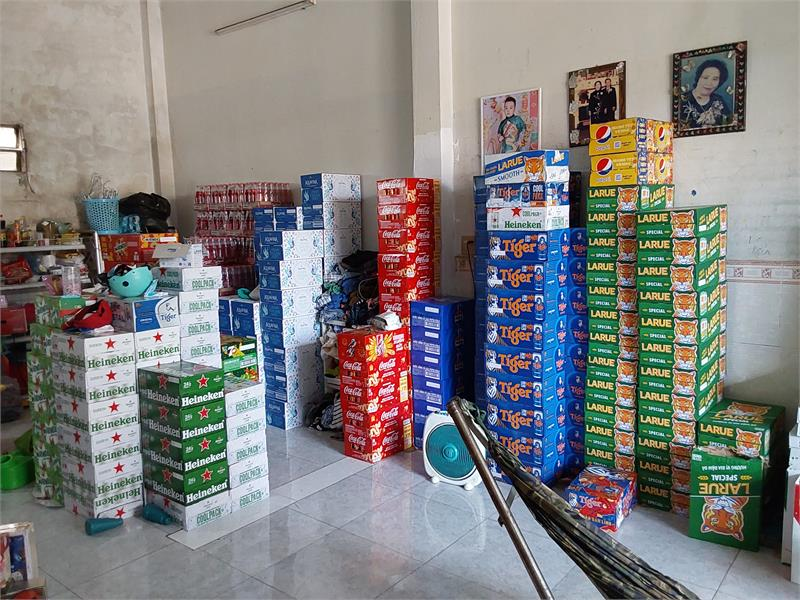

In [45]:
image

{'model': 'llava',
 'created_at': '2024-06-14T04:38:06.714860813Z',
 'response': " In the picture, there is a room filled with various packaged goods. There are stacks of what appear to be snack items or processed food products, boxes with different logos and text, and possibly some household cleaning supplies. The room looks like it could be a storage area or a small storefront where these items are being stored for sale or distribution. The walls are bare, and there's a sign with Chinese characters that might indicate the type of business this is. There's also a figure in the background who seems to be looking at something out of frame. ",
 'done': True,
 'context': [733,
  16289,
  28793,
  1824,
  511,
  368,
  1032,
  297,
  456,
  5754,
  28804,
  733,
  28748,
  16289,
  28793,
  560,
  272,
  5754,
  28725,
  736,
  349,
  264,
  2003,
  6774,
  395,
  4118,
  2163,
  2569,
  11282,
  28723,
  1387,
  460,
  341,
  6507,
  302,
  767,
  4305,
  298,
  347,
  2502,
  468,
  4907

In [11]:
import os, io
import json
import binascii
from os import PathLike
from pathlib import Path
from base64 import b64encode, b64decode

from typing import Any, AnyStr, Union, Optional, Sequence, Mapping, Literal

def _encode_image(image) -> str:

  if p := _as_path(image):
    return b64encode(p.read_bytes()).decode('utf-8')

  try:
    b64decode(image, validate=True)
    return image if isinstance(image, str) else image.decode('utf-8')
  except (binascii.Error, TypeError):
    ...

  if b := _as_bytesio(image):
    return b64encode(b.read()).decode('utf-8')

  raise ValueError('image must be bytes, path-like object, or file-like object')

def _as_path(s: Optional[Union[str, PathLike]]) -> Union[Path, None]:
  if isinstance(s, str) or isinstance(s, Path):
    try:
      if (p := Path(s)).exists():
        return p
    except Exception:
      ...
  return None


def _as_bytesio(s: Any) -> Union[io.BytesIO, None]:
  if isinstance(s, io.BytesIO):
    return s
  elif isinstance(s, bytes):
    return io.BytesIO(s)
  return None


In [18]:
import os, json
import requests
from PIL import Image


OLLAMA_URL_LOCAL = "http://localhost:11434"
OLLAMA_API = ["api/generate", 
              "api/chat"]
headers = {
    "Content-Type": "application/json"
}
#       "system": systemPrompt,
image =  Image.open("./samples/66505089_1708691859456.jpg")

payload = {
      "model": "llava",
      "prompt": "What do you see in this picture?", 
      "stream": False, 
      "images": [_encode_image("./samples/66505089_1708691859456.jpg")]
      }
response = requests.post(url="http://localhost:11434/api/generate", 
                         headers=headers, 
                         data=json.dumps(payload))

json.loads(response.text)

{'model': 'llava',
 'created_at': '2024-06-14T04:49:41.23419515Z',
 'response': ' The image shows an indoor environment that appears to be a store or a room used for storage. There are multiple stacks of boxes, some of which have visible branding like "Royal Gorge," indicating they may contain products such as snack foods or confectionery. In the background, there\'s a counter with various items on it, and personal belongings like a chair are scattered around. The room has a concrete floor and white walls, suggesting an informal or commercial space. There is no one in the image to provide context or scale. ',
 'done': True,
 'context': [733,
  16289,
  28793,
  1824,
  511,
  368,
  1032,
  297,
  456,
  5754,
  28804,
  733,
  28748,
  16289,
  28793,
  415,
  3469,
  4370,
  396,
  24990,
  4466,
  369,
  8045,
  298,
  347,
  264,
  4143,
  442,
  264,
  2003,
  1307,
  354,
  7073,
  28723,
  1387,
  460,
  5166,
  341,
  6507,
  302,
  13446,
  28725,
  741,
  302,
  690,
  506,
 

In [16]:
import base64
with open("./samples/66505089_1708691859456.jpg", "rb") as imagefile:
    convert = base64.b64encode(imagefile.read()).decode('utf-8')
print(type(convert))

<class 'bytes'>


In [17]:
encoded_img = _encode_image("./samples/66505089_1708691859456.jpg")
type(encoded_img)

str